# Overfitting vs Underfitting and How To Address Them

## Bias vs Variance
- Bias: 
    - It's the model's tendency to make errors due to simplifying assumption
    - High bias means the model is too simplistic and cannot capture the true patterns and nuances in the data
    - High bias = underfitting
    - e.g. trying to fit a straight line into a curved relationship. Linear regression applied to a non-linear problem
- Variance:
    - It's the model's sensitivity to small fluctuations or nuances in the training data (overcomplicating assumptions)
    - High variance means the model is overly complex and fits the training data too closely
    - High variance = overfitting
    - a decision tree model with too many branches

![vb](https://miro.medium.com/v2/resize:fit:1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

![fitting.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

## Summary for Overfitting vs Underfitting
- Overfitting: high variance and low bias
- Underfitting: low variance and high bias

### Addressing Overfitting and Underfitting
- For overfitting: simplify the model complexity by:
    - using fewer features
    - reducing the complexity of model parameters (hyperparameter turning)
    - applying regularization
- For underfitting: increase the complexity by:
    - adding more feature (feature engineering)
    - increase the amount of training data where you have more diverse instances 


## Detecting and Preventing Overfitting or Underfitting

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#we'll be using decision tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

In [3]:
#create X and y variables using make class
X, y = make_classification(n_samples=90000, #9k data points
                           n_features= 18, #total num of features for prediction
                           n_informative=4, #num of features that will be useful for the ML model
                           n_redundant=12, #num of features that may cause noise
                           random_state=2
                           )

In [4]:
X[:20]

array([[-9.15146168e-01, -9.58234234e-01,  4.00350053e+00,
        -1.16957962e+00,  1.31235427e+00,  1.16720558e+00,
         1.48916254e+00,  7.91533533e-01,  6.19137870e-01,
         3.96226832e+00, -2.93145850e+00, -4.31151815e+00,
        -3.54987001e+00, -9.97183224e-01,  2.26712525e-01,
         1.59749733e+00, -1.11512993e+00,  3.60155215e+00],
       [-1.62965867e+00,  4.27837121e-01,  1.07239615e+00,
        -1.32112143e+00, -1.64276464e+00,  1.98390014e+00,
        -2.05344082e+00,  1.88719978e-01, -3.91699962e-01,
         2.37566500e+00,  8.73834744e-01, -8.51895349e-01,
         5.45221497e-03, -2.78281316e-01,  1.26717378e+00,
         1.79364219e+00, -1.28329202e+00,  1.18617020e+00],
       [ 1.72400715e+00, -1.55748830e+00,  1.50309880e+00,
        -1.81028793e+00, -8.37511597e-01,  6.80123203e-01,
        -1.65342806e-01, -5.84031905e-01,  7.41828349e-01,
        -2.41962498e+00, -2.60131029e+00, -3.60856067e-01,
        -5.61256701e-01, -2.57619349e-01,  2.09021669e

In [5]:
# optional step - for data display  only
import numpy as np
import pandas as pd
#show the data in a tablular format
pd.DataFrame(np.hstack((X,y.reshape(-1,1)))) #join X and y (convert y into a vertical array col)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.915146,-0.958234,4.003501,-1.169580,1.312354,1.167206,1.489163,0.791534,0.619138,3.962268,-2.931458,-4.311518,-3.549870,-0.997183,0.226713,1.597497,-1.115130,3.601552,1.0
1,-1.629659,0.427837,1.072396,-1.321121,-1.642765,1.983900,-2.053441,0.188720,-0.391700,2.375665,0.873835,-0.851895,0.005452,-0.278281,1.267174,1.793642,-1.283292,1.186170,0.0
2,1.724007,-1.557488,1.503099,-1.810288,-0.837512,0.680123,-0.165343,-0.584032,0.741828,-2.419625,-2.601310,-0.360856,-0.561257,-0.257619,0.209022,-0.499038,1.670271,1.146012,0.0
3,1.493180,-0.615408,2.746625,-1.571029,-0.657131,1.443767,-2.299731,-0.153087,-0.712489,1.154912,-2.803760,-4.039223,-1.786585,-2.258854,-0.886571,0.485662,-2.027974,-0.133158,1.0
4,0.278379,-0.717891,1.239263,0.202299,1.590907,-0.589205,2.134275,0.303407,0.977623,0.548217,-1.753008,-1.302399,-1.648625,-0.101723,0.529778,-0.200561,0.427007,1.312180,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,2.056433,-1.889946,2.001512,0.764780,3.686820,-2.106518,4.864307,0.284488,0.153409,-0.957061,-4.423295,-2.195691,-3.182606,-0.273270,-0.946359,-1.605704,1.701569,1.685504,0.0
89996,-0.834247,-0.443990,1.824342,-0.167188,1.237163,0.191257,1.694280,0.565917,1.574625,2.238270,-1.262308,-1.859922,-1.912773,-0.135584,1.191608,0.770665,-0.273578,2.167490,1.0
89997,1.787583,-1.664080,1.681517,-1.481538,-0.143162,0.290815,0.639970,-0.450012,-0.689668,-2.186482,-2.984734,-0.707185,-1.033390,-0.269881,-0.007127,-0.648711,1.711200,1.335945,0.0
89998,0.898946,-0.819804,0.749571,0.393158,1.631513,-0.996701,2.211275,0.112658,-0.566082,-0.552221,-1.853721,-0.778746,-1.304564,-0.035058,-0.543048,-0.761582,0.856409,0.704378,0.0


- above is the dataset we generated
- col 18 is the target (y) and it's binary class

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

### Deploy A Decision Tree Algorithm

- it's a popular ML algo that works on both classification and regression problems:
    - classification: `DecisionTreeClassifier()`
    - regression: `DecisionTreeRegressor()`

![dt2](https://eloquentarduino.github.io/wp-content/uploads/2020/08/DecisionTree.png)

![dt](https://miro.medium.com/v2/resize:fit:1358/0*LE5dtoUiXduhrad1)

**Objective** 
- We'll be increasing the complexity of the tree branches gradually and observe the accuracy.
- increasing complexity -> moving closer to overfitting or capture the nuances and noise in the data
- increasing complexity for decision trees can be done in multiple ways, we'll be using `max_depth` which adjusts the number of layers in the decision tree

to achieve this simulation exercise:
- define a range of `max_depth` e.g. 1 to 10
- deploy the model with `max_depth = i`
- Fit the model and create train_yhat (predicted values from algo based on training data)
- Get the accuracy score for train
- do the same steps for test
- print and plot the output

In [7]:
# create 2 empty lists 1 for test and another for train scores
train_scores, test_scores = list(), list()

define the range of my values for `max_depth`

In [8]:
par_values = list(range(1,21))
par_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [9]:
# let's build a loop that iterates for the steps mentioned above

for i in par_values:
    #define the model
    model = DecisionTreeClassifier(max_depth=i)

    #train or fit the model
    model.fit(X_train, y_train)

    #get the predicted values for training dataset
    y_hat_train = model.predict(X_train)
    #get the accuracy
    train_accu = accuracy_score(y_train, y_hat_train) #actual vs predicted values

    #do the same for test dataset
    y_hat_test = model.predict(X_test)
    test_accu = accuracy_score(y_test, y_hat_test) #actual vs predicted values

    #capture the accuracy results and append them into our blank lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #print a report of the results
    print(f'Iteration with max_depth={i} \t| train score:{train_accu:.3f} \t| test score:{test_accu:.3f}')


Iteration with max_depth=1 	| train score:0.726 	| test score:0.731
Iteration with max_depth=2 	| train score:0.745 	| test score:0.747
Iteration with max_depth=3 	| train score:0.778 	| test score:0.780
Iteration with max_depth=4 	| train score:0.788 	| test score:0.790
Iteration with max_depth=5 	| train score:0.792 	| test score:0.793
Iteration with max_depth=6 	| train score:0.826 	| test score:0.825
Iteration with max_depth=7 	| train score:0.844 	| test score:0.838
Iteration with max_depth=8 	| train score:0.857 	| test score:0.849
Iteration with max_depth=9 	| train score:0.866 	| test score:0.856
Iteration with max_depth=10 	| train score:0.876 	| test score:0.859
Iteration with max_depth=11 	| train score:0.884 	| test score:0.859
Iteration with max_depth=12 	| train score:0.894 	| test score:0.857
Iteration with max_depth=13 	| train score:0.904 	| test score:0.854
Iteration with max_depth=14 	| train score:0.914 	| test score:0.852
Iteration with max_depth=15 	| train score:

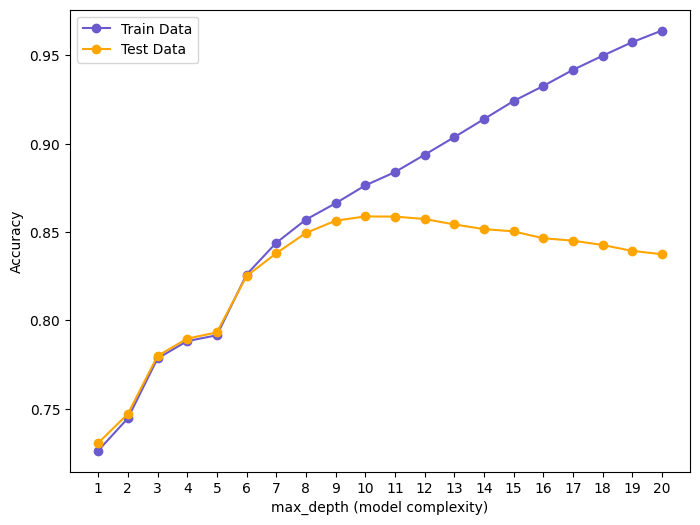

In [10]:
# plot the results
plt.figure(figsize=(8,6))
plt.plot(par_values, train_scores, '-o', label='Train Data', color='slateblue')
plt.plot(par_values, test_scores, '-o', label='Test Data', color='orange')
plt.xticks(par_values)
plt.ylabel('Accuracy')
plt.xlabel('max_depth (model complexity)')
plt.legend()

**Summary**
- Underfitting: the model has underfitting (low accuracy = simplified model) from 1 to 3
- Overfitting: divergence in the model starts around depth = 7. This is where the model starts to diverge between train and test datasets. In other words, the model is starting to have overfitting.
- For the accuracy vs overfitting trade-off, we can say have a `max_depth` between 8 and 11 would be a good range
- Another approach is to perform hyperparameter tuning for additional parameters.
    - Since we don't have a dedicated regularization function in decision trees, we can perform **pre-pruning**
    - `min_samples_split` specifies the min num of samples required to split
    - `min_samples_leaf` sets the min num of samples to build a leaf in the structure (helps avoid overfitting by not paying attention to noise in the data)

In [12]:
# let's rebuild our model with specific hyperparameters

#define the model
model = DecisionTreeClassifier(max_depth=10,
                               min_samples_split=2,
                                min_samples_leaf=1)

#train or fit the model
model.fit(X_train, y_train)

#get the predicted values for training dataset
y_hat_train = model.predict(X_train)
#get the accuracy
train_accu = accuracy_score(y_train, y_hat_train) #actual vs predicted values

#do the same for test dataset
y_hat_test = model.predict(X_test)
test_accu = accuracy_score(y_test, y_hat_test) 

In [16]:
print(f'train score:{train_accu:.3f} \ntest score:{test_accu:.3f}')

train score:0.876 
test score:0.859


- With the hyperparameters specified above, we see a good balance in the trade-off between accuracy vs overfitting

### Visualizing The Decision Tree 

In [17]:
from sklearn.tree import export_text

my_tree_representation = export_text(model)
print(my_tree_representation)

|--- feature_9 <= 0.26
|   |--- feature_11 <= -2.52
|   |   |--- feature_16 <= 1.02
|   |   |   |--- feature_4 <= -3.07
|   |   |   |   |--- feature_0 <= 2.73
|   |   |   |   |   |--- feature_10 <= -2.13
|   |   |   |   |   |   |--- feature_0 <= 1.85
|   |   |   |   |   |   |   |--- feature_12 <= -0.79
|   |   |   |   |   |   |   |   |--- feature_1 <= -1.56
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  -1.56
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_12 >  -0.79
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  1.85
|   |   |   |   |   |   |   |--- feature_12 <= -0.29
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_12 >  -0.29
|   |   |   |   |   |   |   |   |--- feature_9 <= -0.51
|   |   |   |   |   |   |   |   |   |--- feature_16 <= -1.78
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |  

## Perform Hyperparameter Tuning Using `GridSearchCV`

- Hyperparameters: they are the parameters (knobs) in a machine learning model that are used to tweak the complexity and performance of the model.
- Hyperparameter Tuning: is the processing of finding the best Hyperparameters settings for a machine learning model:
    - trial and error
    - nested loops (example above)
    - `GridSearchCV`
    - ML Automation API tools like Azure and DataRobot

In [26]:
# step 1: import GS
from sklearn.model_selection import GridSearchCV

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
# step 2 - define your list of hyperparameters to simulate
param_grid = {
                'criterion':['gini','entropy'],
                'max_depth': [2,4,6,10,15],
                'min_samples_split':[5,10,15,20,30,50]
}

#### Cross Validation
![cv](https://user-images.githubusercontent.com/26833433/258589390-8d815058-ece8-48b9-a94e-0e1ab53ea0f6.png)

- Cross-validation: is an important concept in ML. It involves partitioning the dataset inti multiple subsets (folds e.g 5 folds) then training and evaluating the model accuracy multiple times (5 times in our example) each time using a different fold.
- It helps provide a more reliable estimate of the model's performance by reducing the variance associated with a single train-test-split.

In the example below, we'll perform 3 cross-validations

### Perform GridSearchCV

In [29]:
GS_DT_model = GridSearchCV(
                        DecisionTreeClassifier(),
                        param_grid,
                        cv=3, #cross validation param
                        scoring='accuracy' # tells GS what metric to use to determine the best parameters
                        )

In [30]:
GS_DT_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 15],
                         'min_samples_split': [5, 10, 15, 20, 30, 50]},
             scoring='accuracy')

- it took a long time because it tested 3 (cv) x 2 x 5 x 6 = 180 iterations
- let's check the best suitable hyperparameters

In [31]:
GS_DT_model.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [32]:
GS_DT_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50}

In [33]:
# get the accuracy of the best params
y_test_hat = GS_DT_model.best_estimator_.predict(X_test)
accuracy_score(y_test, y_test_hat)

0.8566296296296296

In [36]:
pd.DataFrame(GS_DT_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.156856,0.015455,0.002434,0.000259,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.743238,0.740524,0.748476,0.744079,0.003301,55
1,0.143687,0.001366,0.002573,0.000989,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.743238,0.740524,0.748476,0.744079,0.003301,55
2,0.146176,0.005202,0.002574,0.000571,gini,2,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.743238,0.740524,0.748476,0.744079,0.003301,55
3,0.143880,0.001025,0.002192,0.000185,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.743238,0.740524,0.748476,0.744079,0.003301,55
4,0.145817,0.000679,0.002026,0.000040,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.743238,0.740524,0.748476,0.744079,0.003301,55
